In [11]:
using Images

In [12]:
using ImageSegmentation

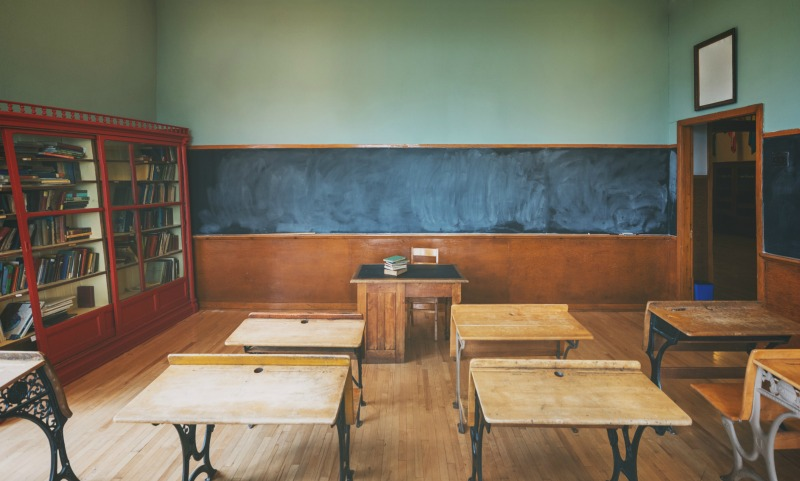

In [35]:
oroom=load("oclassroom.jpg")

In [34]:
seeds = [(CartesianIndex(104, 48), 1), (CartesianIndex( 49, 40), 1),
                (CartesianIndex( 72,131), 1), (CartesianIndex(109,217), 1),
                (CartesianIndex( 28, 87), 2), (CartesianIndex( 64,201), 2),
                (CartesianIndex(104, 72), 2), (CartesianIndex( 86,138), 2)];

In [36]:
segments = seeded_region_growing(oroom, seeds)

Segmented Image with:
	 labels map: 481×800 Array{Int64,2}
	 number of labels: 2

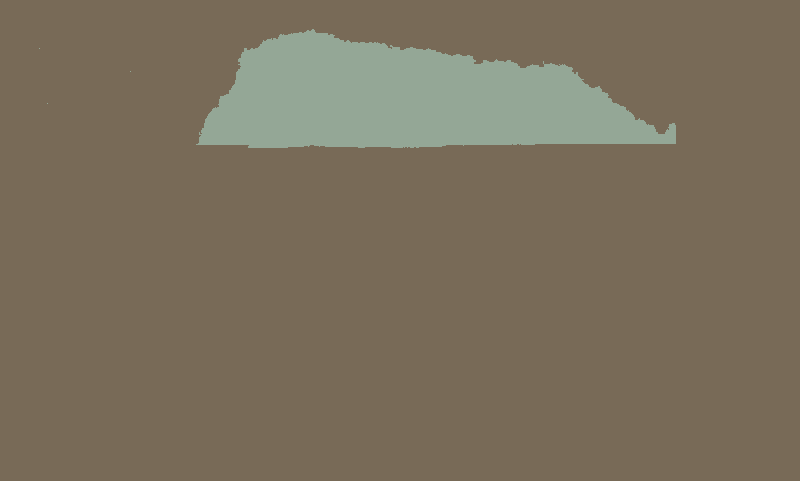

In [37]:
img3=(map(i->segment_mean(segments,i), labels_map(segments)))

In [17]:
a=["老大", "87" , "遮城" , "帥哥"]
a[rand(1:end)]

"遮城"

In [28]:
segments2 = felzenszwalb(oroom, 100, 100)

Segmented Image with:
	 labels map: 481×800 Array{Int64,2}
	 number of labels: 19

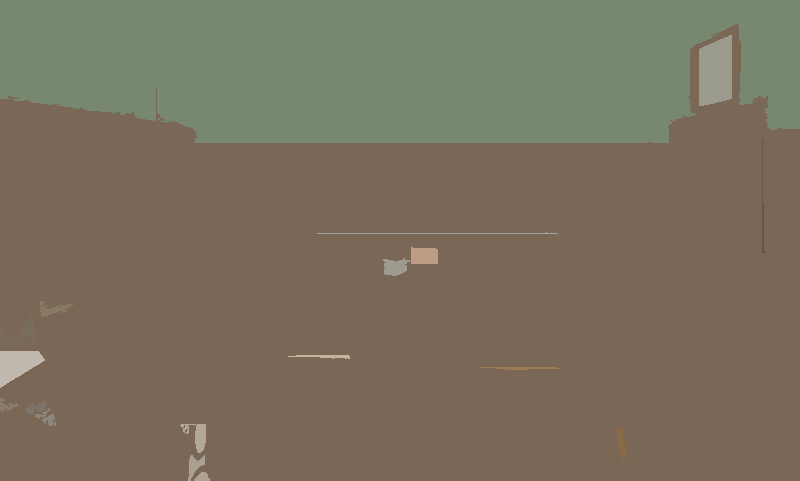

In [29]:
img4=map(i->segment_mean(segments2,i), labels_map(segments2))

In [52]:
function medianrgb(img::Array,i::Int)
    chimg=channelview(img);
    img_r = mapwindow(median!,chimg[1,:,:], (i,i));
    img_g = mapwindow(median!,chimg[2,:,:], (i,i));
    img_b = mapwindow(median!,chimg[3,:,:], (i,i));
    Nimg=zeros(3,size(img,1),size(img,2));
    Nimg[1,:,:]=img_r;
    Nimg[2,:,:]=img_g;
    Nimg[3,:,:]=img_b;
    NimgC=colorview(RGB,Nimg);
    return NimgC
end

medianrgb (generic function with 1 method)

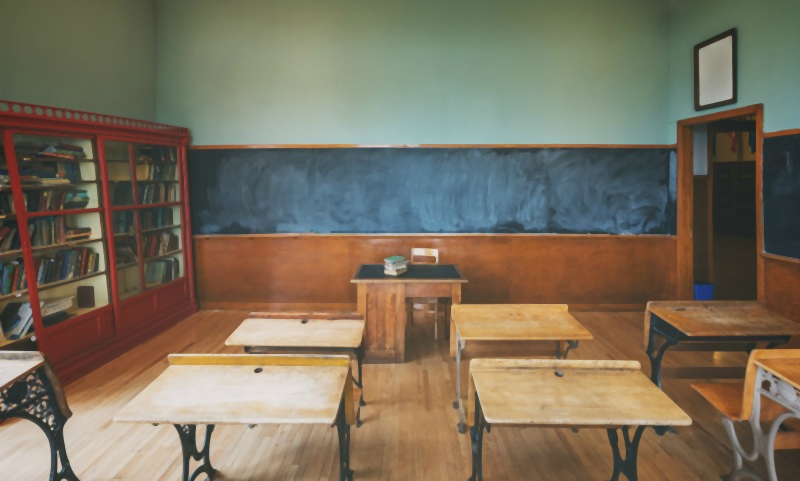

In [71]:
medianrgb(oroom,3)

In [69]:
include("solveTVL1.jl")
include("solveTVL1RGB.jl")

solve_TVL1_RGB (generic function with 2 methods)

In [3]:
solve_TVL1_RGB(oroom)

LoadError: [91mUndefVarError: solve_TVL1_RGB not defined[39m

================================[ BUILD ERRORS ]================================


 - packages with build errors remain installed in C:\Users\misc\.julia\v0.6
 - build the package(s) and all dependencies with `Pkg.build("MbedTLS", "ZMQ")`
 - build a single package by running its `deps/build.jl` script



In [65]:
size(oroom,2)

800

In [74]:
seg = fast_scanning(oroom, 0.1);  # threshold = 0.1
seg = prune_segments(seg, i->(segment_pixel_count(seg,i)<50), (i,j)->(-segment_pixel_count(seg,j)))

Segmented Image with:
	 labels map: 481×800 Array{Int64,2}
	 number of labels: 226

In [2]:
Pkg.build("Cairo", "MbedTLS", "ZMQ")

INFO: No packages to install, update or remove
INFO: Building WinRPM
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win32/openSUSE_Leap_42.2/repodata/repomd.xml
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win64/openSUSE_Leap_42.2/repodata/repomd.xml
INFO: Building Cairo
INFO: Updating WinRPM package list
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win32/openSUSE_Leap_42.2/repodata/repomd.xml
INFO: Downloading https://cache.julialang.org/http://download.opensuse.org/repositories/windows:/mingw:/win64/openSUSE_Leap_42.2/repodata/repomd.xml
INFO: Building MbedTLS
===============================[ ERROR: MbedTLS ]===============================

LoadError: unlink: operation not permitted (EPERM)
while loading C:\Users\misc\.julia\v0.6\MbedTLS\deps\build.jl, in expression starting on line 45

INFO: Building ZMQ
======

In [1]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating PersistenceBarcodes master...
INFO: Updating Ripser master...
INFO: Updating Eirene master...
INFO: Computing changes...
